In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
da_full=np.loadtxt('../../data/BMX_petal_surface_Rhino.txt')

7769


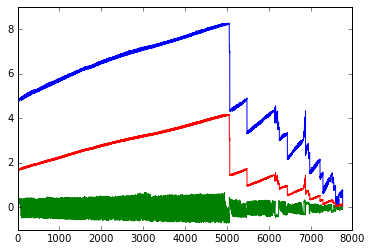

In [3]:
## let's make fewer pints by some large factor
da=da_full[::10]
xs=da[:,0]
ys=da[:,1]
zs=da[:,2]
print(len(da))
plt.plot(xs)
plt.plot(ys)
plt.plot(zs)


In [4]:
from scipy.optimize import minimize as fmin
inv=np.zeros(6)
def zmod(x):
    return x[0]+x[1]*xs+x[2]*ys+x[3]*xs*xs+x[4]*xs*ys+x[5]*ys*ys
def chi2(x):
    par=zmod(x)
    chi2=((zs-par)**2).sum()
    return chi2
bestx=fmin(chi2,inv).x
    

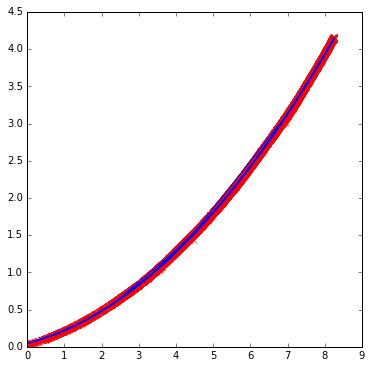

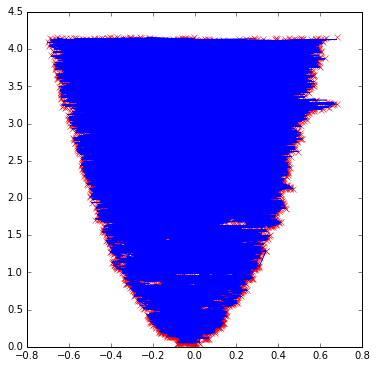

In [5]:
## let's plot some fits
zfit=zmod(bestx)
plt.figure(figsize=(6,6))
plt.plot(xs,zs,'rx')
plt.plot(xs,zfit)
plt.figure(figsize=(6,6))
plt.plot(ys,zs,'rx')
plt.plot(ys,zfit)


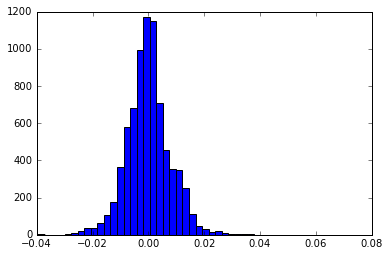

In [6]:
#let's plot histogram of residuals
res=zfit-zs
tmp=plt.hist(res,bins=50)

In [7]:
# now use this fit to fit the full dataset
xs=da_full[:,0]
ys=da_full[:,1]
zs=da_full[:,2]
bestx=fmin(chi2,bestx).x

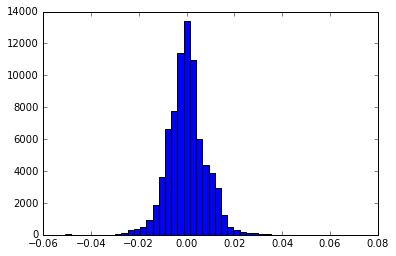

In [8]:
zfit=zmod(bestx)
res=zfit-zs
tmp=plt.hist(res,bins=50)

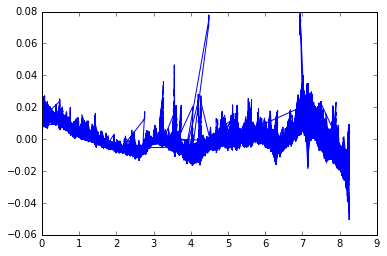

In [9]:
plt.plot (xs,res)